In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 아래의 데이터에서 행복도지수 "score'를 예측하는 모델을 머신러닝 모델과 딥러닝 neural net 모델로 각각 생성하고,
# 모델을 저장하시오
# 'year', 'rank', 'country' 칼럼은 제외하시오..

In [3]:
df = pd.read_csv('C:\\Users\\M\\Downloads\\Bigdata\\world_happiness_index.csv')
df.head()

,year,rank,country,score,economy,family,health,freedom,generosity,trust,residual
0,2015,0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.51738
1,2015,1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.70201
2,2015,2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2.49204
3,2015,3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2.46531
4,2015,4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2.45176


In [4]:
df.drop(['year','rank','country'],axis=1,inplace=True)

In [ ]:
#머신러닝

In [ ]:
df

In [12]:
df.trust.fillna(df.trust.mean(),inplace=True)

C:\Users\M\AppData\Local\Temp\ipykernel_2508\1673521190.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.trust.fillna(df.trust.mean(),inplace=True)


In [13]:
x=df.drop('score',axis=1)
y=df.score

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print(r2_score(y_test,pred), mean_squared_error(y_test,pred))

0.9999993067024789 8.43600450687051e-07


In [ ]:
#딥러닝

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [17]:
x.shape

(935, 7)

In [18]:
model=Sequential()
model.add(Dense(60,input_dim=7,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1))

c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
x_train = x_train.values.astype('float32')
x_test = x_test.values.astype('float32')
y_train = y_train.values.astype('float32')
y_test = y_test.values.astype('float32')

In [20]:
model.compile(optimizer='adam',loss='mse')

In [22]:
history=model.fit(x_train,y_train,epochs=100,batch_size=50,validation_data=(x_test,y_test))

Epoch 1/100


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.5121e-05 - val_loss: 4.6003e-05
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.5484e-05 - val_loss: 7.5938e-05
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.5180e-05 - val_loss: 3.9954e-05
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3398e-05 - val_loss: 4.0455e-05
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8160e-05 - val_loss: 5.8318e-05
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3267e-05 - val_loss: 4.4715e-05
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5123e-05 - val_loss: 5.1471e-05
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9957e-05 - val_loss: 3.7964e-05
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4900e-05 - val_loss: 3.8480e-05
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.4654e-05 - val_loss: 5.0827e-05
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.5659e-05 - val_loss

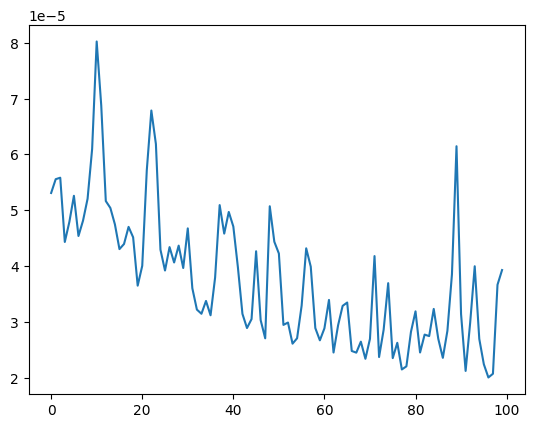

In [24]:
plt.plot(history.history['loss'])

In [ ]:
# 아래의 코드에서 Kyphosis를 분류하는 머신러닝 모델을 생성하고 딥러닝 neural network모델 중 binary classification과
# multi classification 두 방식으로 neural net 모델을 생성하고, 모델을 저장하시오

In [26]:
df = pd.read_csv('C:\\Users\\M\\Downloads\\Bigdata\\kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [27]:
y=df.Kyphosis
x=df.drop('Kyphosis',axis=1)

In [ ]:
#머신러닝

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      absent       0.82      1.00      0.90        14
     present       0.00      0.00      0.00         3

    accuracy                           0.82        17
   macro avg       0.41      0.50      0.45        17
weighted avg       0.68      0.82      0.74        17



c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

In [46]:
#딥러닝 바이너리

In [47]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
y_enc=label.fit_transform(y)

In [48]:
# x_train = x_train.values.astype('float32')
# x_test = x_test.values.astype('float32')

In [56]:
x.shape

(81, 3)

In [63]:
model = Sequential()
model.add(Dense(30, input_dim = 3, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [65]:
model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100


UnimplementedError: Graph execution error:

Detected at node compile_loss/binary_crossentropy/Cast defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\M\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\M\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\M\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\M\AppData\Roaming\Python\Python312\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 641, in run_forever

  File "c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 1987, in _run_once

  File "c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\asyncio\events.py", line 88, in _run

  File "C:\Users\M\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\Users\M\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\Users\M\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\M\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "C:\Users\M\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\Users\M\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "C:\Users\M\AppData\Roaming\Python\Python312\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\M\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\M\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\M\AppData\Roaming\Python\Python312\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\M\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\M\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\M\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\M\AppData\Local\Temp\ipykernel_2508\3127659246.py", line 1, in <module>

  File "c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 318, in fit

  File "c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 121, in one_step_on_iterator

  File "c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 108, in one_step_on_data

  File "c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 54, in train_step

  File "c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\trainer.py", line 357, in _compute_loss

  File "c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\trainer.py", line 325, in compute_loss

  File "c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\compile_utils.py", line 609, in __call__

  File "c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\compile_utils.py", line 645, in call

  File "c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\losses\loss.py", line 39, in __call__

  File "c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\tree\tree_api.py", line 148, in map_structure

  File "c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\tree\optree_impl.py", line 79, in map_structure

  File "c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\optree\ops.py", line 747, in tree_map

  File "c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\losses\loss.py", line 40, in <lambda>

  File "c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\core.py", line 743, in convert_to_tensor

  File "c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\core.py", line 120, in convert_to_tensor

Cast string to float is not supported
	 [[{{node compile_loss/binary_crossentropy/Cast}}]] [Op:__inference_one_step_on_iterator_22120]